# Multilimearizações: implementação e discussões

## Introdução

O conceito de multilimiarização é similar ao da limearização simples, apenas adotam se mais de um limiar, resultando e mais regiões de transformação na imagem. A transformação ocorre mediante a aplicação da seguinte funcão: 

$g(x,y) = 0 $, se $f(x,y) < Linf$, ou $g(x,y) = h$, se $Linf<g(x,y)<Lsup$, ou $g(x) = max$, se $f(x,y) \geq Lsup$

No qual, $Linf$ é o limite inferior definido, $Lsup$ o limite superior e $h$ o valor de transformação da região adicionada.

## Implementação (código-fonte)

Importação dos pacotes utilizados para simulação:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [2]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir o limiar

In [3]:
Filter = nf.structtype()                # Cria variavel do tipo struct (similar ao matlab)

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

Filter.multiLimiar = np.array([80, 120])
Filter.multiRange = np.array([127])

numAp = 1
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

### Aplicação efetida do método:

In [4]:
#############################################################################################
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k, :, :] = nf.multiLimiar(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1, :, :]
        U[k, :, :] = nf.multiLimiar(Filter)
        print(U[k, :, :])

################################
Process finished
Multilimiar have been applied
################################
[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [ 255.  255.  255. ...,  127.  127.  127.]
 [ 255.  255.  255. ...,  127.  127.  127.]
 [ 255.  255.  255. ...,  127.  127.  127.]]


### Exibir resultados:

- Imagem original:

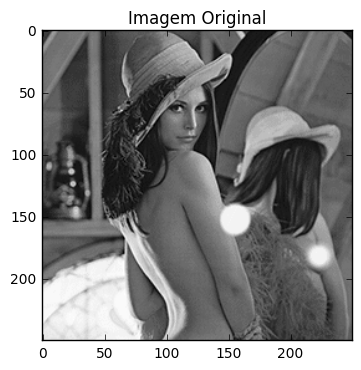

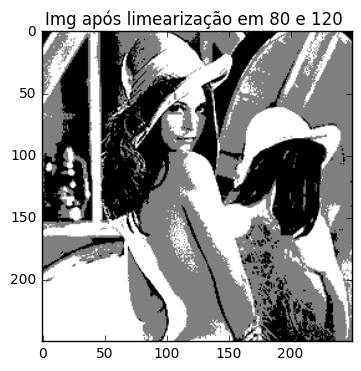

In [5]:
#############################################################################################
########## Plot images:

########## Using matplotlib #################
plt.figure(1)
#plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Imagem Original')

#plt.subplot(122)
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Img após limearização em %d e %d ' % (Filter.multiLimiar[0], Filter.multiLimiar[1]))
plt.show()

#### Apêndice 01 - Função para cálculo do histograma:

In [6]:
def multiLimiar (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    if Filter.multiLimiar.size == 2:
        T2 = Filter.multiLimiar[1]
        T1 = Filter.multiLimiar[0]
        Gmin = 0
        Gmed = Filter.multiRange[0]
        Gmax = 255

    if Filter.multiLimiar.size == 3:
        T3 = Filter.multiLimiar[2]
        T2 = Filter.multiLimiar[1]
        T1 = Filter.multiLimiar[0]
        Gmin = 0
        Gmed1 = Filter.multiRange[0]
        Gmed2 = Filter.multiRange[1]
        Gmax = 255
    #################### Limiar


    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            if Filter.multiLimiar.size == 3:
                if A[j, k] > T3:
                    D[j, k] = Gmax
                elif A[j,k] <= T3 and A[j, k] > T2:
                    D[j, k] = Gmed2
                elif A[j, k] <= T2 and A[j, k] > T1:
                    D[j, k] = Gmed1
                elif A[j,k] <= T1:
                    D[j, k] = Gmin

            if Filter.multiLimiar.size == 2:
                if A[j, k] > T2:
                    D[j, k] = Gmax
                elif A[j,k] <= T2 and A[j, k] > T1:
                    D[j, k] = Gmed
                elif A[j,k] <= T1:
                    D[j, k] = Gmin

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Multilimiar have been applied')
    print('################################')

    return D

## Discussões sobre o método

### Imagem com distribuição distinta do histograma:

Utilizando uma imagem composta de:
- Objetos predominantes prestos(valor mínimo da escala de intensidade);
- Objetos predominantes brancos(valor máximo da escala de intensidade);
- Fundo com valor em 50% da escala de cinza.

Temos,

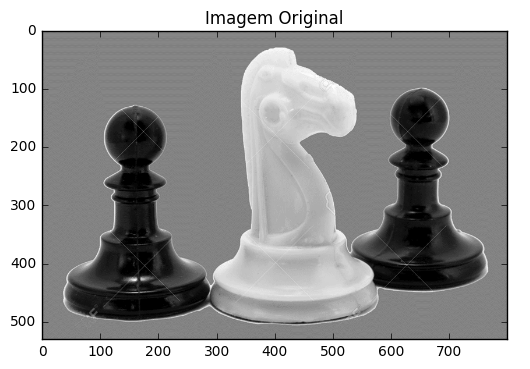

In [7]:
img2 = cv2.imread('xadrez.png',cv2.IMREAD_GRAYSCALE)

plt.figure(1)
#plt.subplot(121)
plt.imshow(img2, 'gray')
plt.title('Imagem Original')
plt.show()

O histrograma dessa imagem possui uma maior densidade em torno do valor médio na escala de cinza (fundo), uma densidade média em regiões próximas a tonalidade de pretos(objetos predominante pretos), e uma densidade menor em valores próximos de branco (objeto predominantemente branco)

################################
Process finished
Histogram has been calculated
################################


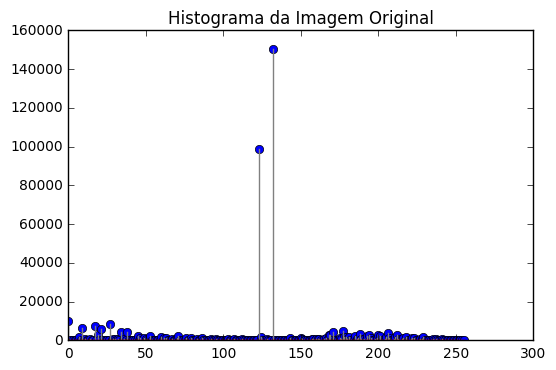

In [8]:
Filter.img = img2

Hist1 = nf.calcHist(Filter.img)

plt.figure(1)
#plt.subplot(121)
plt.stem(Hist1, 'gray')
plt.title('Histograma da Imagem Original')
plt.show()

Com a limearizaçã foi praticamente possível separar os objetos de cores distintas, porém devido a sua limitação era impossível seprar os dois tipos de objetos ao mesmo tempo, deixando apenas o fundo. Para realizar ta objetivo a multimearização mostra-se bastante útil, como exibe-se a seguir.

################################
Process finished
Multilimiar have been applied
################################


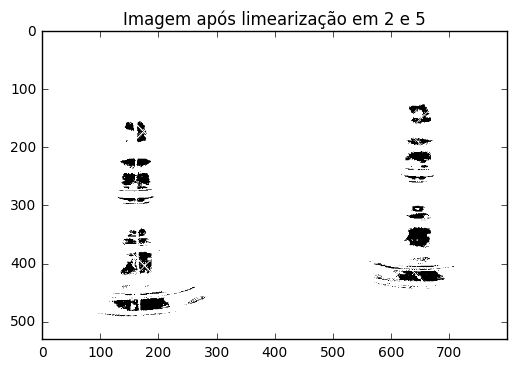

In [9]:
Filter.multiLimiar = np.array([2, 5])
Filter.multiRange = np.array([127])

Saida = nf.multiLimiar(Filter)

plt.figure(1)
plt.imshow(Saida, vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(Filter.multiLimiar[0], Filter.multiLimiar[1]))
plt.show()

################################
Process finished
Multilimiar have been applied
################################


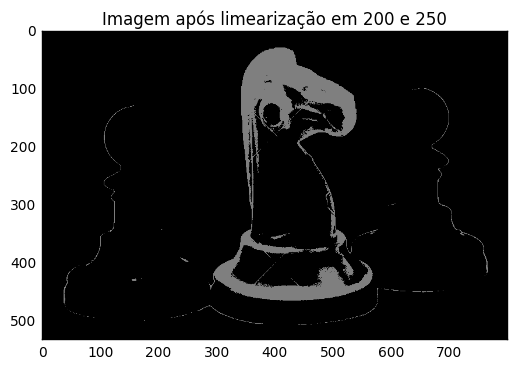

In [10]:
Filter.multiLimiar = np.array([200, 250])
Filter.multiRange = np.array([127])

Saida = nf.multiLimiar(Filter)

plt.imshow(Saida, vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(Filter.multiLimiar[0], Filter.multiLimiar[1]))
plt.show()

################################
Process finished
Multilimiar have been applied
################################


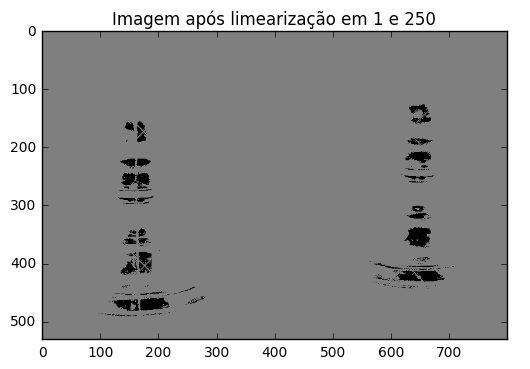

In [11]:
Filter.multiLimiar = np.array([1, 250])
Filter.multiRange = np.array([127])

Saida = nf.multiLimiar(Filter)

plt.imshow(Saida, vmin = 0, vmax = 255, cmap='gray')
plt.title("Imagem após limearização em %d e %d" %(Filter.multiLimiar[0], Filter.multiLimiar[1]))
plt.show()

Foi praticamente possível separar o fundo dos objetos quando escolheu-se os limiares adequados, da seguinte forma:

$g(x,y) = 0 $, se $f(x,y) < 5$, ou $g(x,y) = 127$, se $5<g(x,y)<250$, ou $g(x) = max$, se $f(x,y) \geq 250$

## Conclusões

O processo de multilimiarização é a expansão da limiarização. Tornar-se vantajoso para a segmentação de objetos de cores distintas de branco ou preto, que é a limitação da limiarização simples. Para a segmentação em imagens que possuem diversar variações de iluminações também é recomendável utilizar-se a multilimearização, pela mesma características já citada.